In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('Algerian_forest_fires_own_data_cleaned.csv')
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    float64
 1   RH           243 non-null    float64
 2   Ws           243 non-null    float64
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 22.9 KB


In [47]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


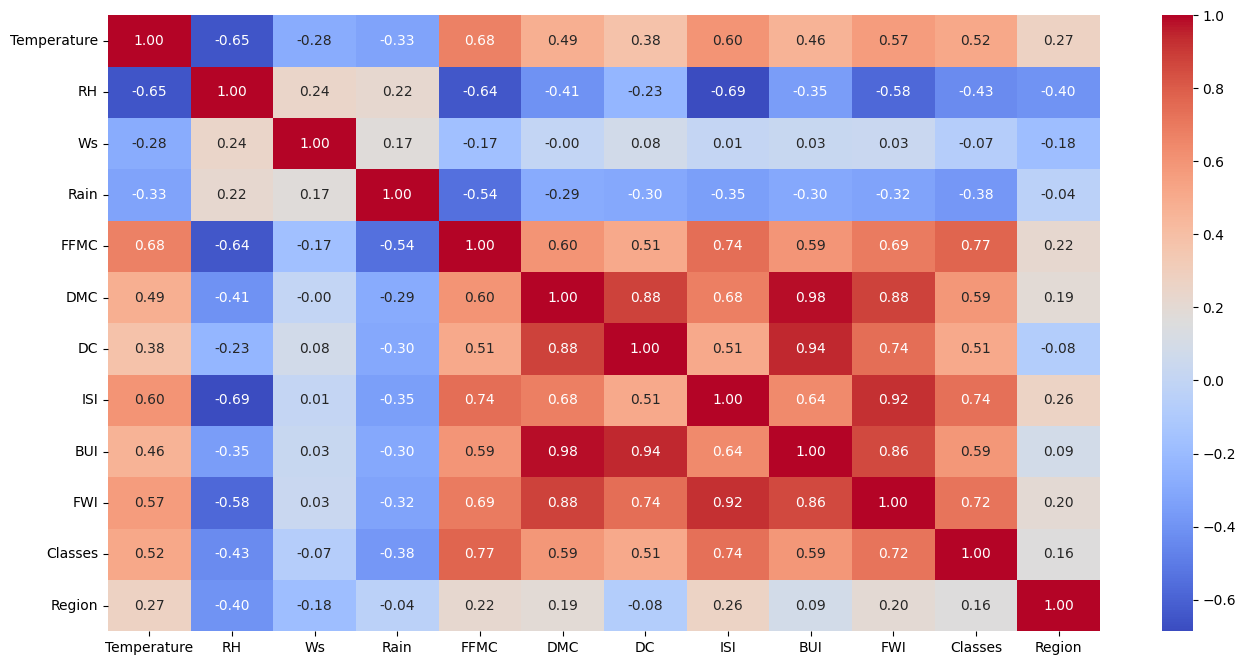

In [48]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='1.2f')
plt.show()

In [49]:
matrix_corr = df.corr()
matrix_corr['FWI'].sort_values(ascending=False)

FWI            1.000000
ISI            0.922895
DMC            0.875864
BUI            0.857973
DC             0.739521
Classes        0.719216
FFMC           0.691132
Temperature    0.566670
Region         0.197102
Ws             0.032368
Rain          -0.324422
RH            -0.580957
Name: FWI, dtype: float64

In [50]:
matrix_corr['FWI'].index.to_list()

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region']

In [51]:
matrix_corr.loc['RH','FWI']

np.float64(-0.5809567466893123)

In [52]:
def extract_main_features(matrix, limit, target):
    list_main_features = []
    for i in matrix_corr[target].index.to_list():
        if i != target and abs(matrix_corr.loc[i,target]) > limit:
            list_main_features.append(i)
    return list_main_features

list_main_features = extract_main_features(matrix_corr, 0.1, 'FWI')
list_main_features

['Temperature',
 'RH',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'Classes',
 'Region']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

In [54]:
#Identify Variables
X = df[list_main_features]
y = df['FWI']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
X_train.shape, X_test.shape

((182, 10), (61, 10))

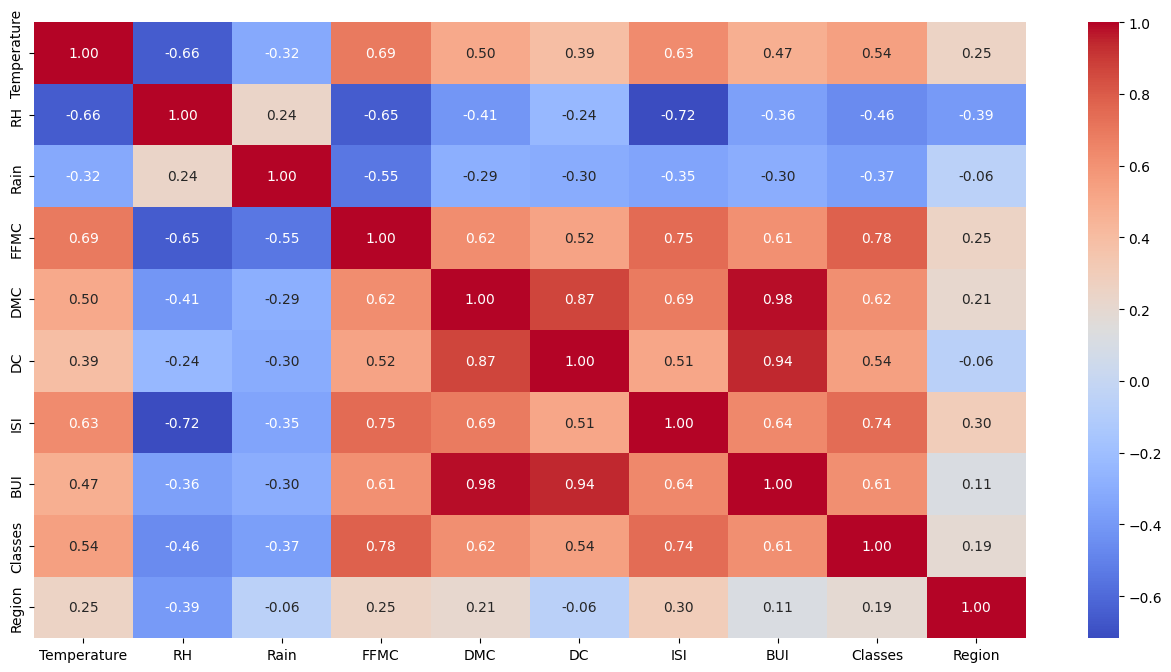

In [57]:
plt.figure(figsize=(16,8))
sns.heatmap(X_train.corr(), annot=True, fmt='1.2f', cmap='coolwarm')
plt.show()

Eliminamos features de X_train que presenten colinealidad alta. Es decir aquellas variables que presenten una correlacion muy alta (>0.9)

In [58]:
#Evalua el triangulo inferior de la matriz de correlacion
def extract_feat_colinealidad(X_dataset, limite):
    cols_high_corr = set()
    corr_matrix = X_dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > limite:
                colname = corr_matrix.columns[i]
                cols_high_corr.add(colname)
    return cols_high_corr

In [59]:
cols_multi_colinealidad = extract_feat_colinealidad(X_train, 0.85)
cols_multi_colinealidad

{'BUI', 'DC'}

In [60]:
X_train = X_train.drop(columns=cols_multi_colinealidad, axis=1)
X_test = X_test.drop(columns=cols_multi_colinealidad, axis=1)
X_train, X_test

(     Temperature    RH  Rain  FFMC   DMC   ISI  Classes  Region
 97          29.0  74.0   0.1  75.8   3.6   2.1        0       0
 141         31.0  72.0   0.2  60.2   3.8   0.8        0       1
 192         40.0  31.0   0.0  94.2  22.5  16.6        1       1
 68          32.0  60.0   0.3  77.1  11.3   2.2        0       0
 119         32.0  47.0   0.7  77.5   7.1   1.8        0       0
 ..           ...   ...   ...   ...   ...   ...      ...     ...
 106         24.0  82.0   0.4  44.9   0.9   0.2        0       0
 14          28.0  80.0   3.1  49.4   3.0   0.4        0       0
 92          25.0  76.0   7.2  46.0   1.3   0.2        0       0
 179         34.0  59.0   0.0  88.1  19.5   7.4        1       1
 102         30.0  77.0   1.8  58.5   1.9   1.1        0       0
 
 [182 rows x 8 columns],
      Temperature    RH  Rain  FFMC   DMC  ISI  Classes  Region
 24          31.0  64.0   0.0  86.7  14.2  5.7        1       0
 6           33.0  54.0   0.0  88.2   9.9  6.4        1       0
 

In [61]:
scaler = StandardScaler()
X_train_scaled_array = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=X_train.columns)
X_train_scaled

,Temperature,RH,Rain,FFMC,DMC,ISI,Classes,Region
0,-0.842842,0.783080,-0.337274,-0.128056,-0.882729,-0.629633,-1.104315,-0.989071
1,-0.301758,0.649508,-0.290487,-1.217586,-0.866876,-0.930585,-1.104315,1.011050
2,2.133120,-2.088702,-0.384060,1.157031,0.615402,2.727139,0.905539,1.011050
3,-0.031216,-0.151919,-0.243701,-0.037262,-0.272379,-0.606483,-1.104315,-0.989071
4,-0.031216,-1.020132,-0.056555,-0.009325,-0.605297,-0.699084,-1.104315,-0.989071
...,...,...,...,...,...,...,...,...
177,-2.195553,1.317365,-0.196914,-2.286163,-1.096748,-1.069486,-1.104315,-0.989071
178,-1.113385,1.183793,1.066320,-1.971876,-0.930289,-1.023186,-1.104315,-0.989071
179,-1.925011,0.916651,2.984564,-2.209337,-1.065041,-1.069486,-1.104315,-0.989071
180,0.509868,-0.218705,-0.384060,0.730997,0.377603,0.597325,0.905539,1.011050


In [62]:
X_test_scaled_array = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=X_test.columns)
X_test_scaled

,Temperature,RH,Rain,FFMC,DMC,ISI,Classes,Region
0,-0.301758,0.115224,-0.384060,0.633218,-0.042508,0.203772,0.905539,-0.989071
1,0.239326,-0.552633,-0.384060,0.737981,-0.383352,0.365823,0.905539,-0.989071
2,-1.113385,-0.285490,0.645242,-0.973140,-0.914435,-0.837985,-1.104315,1.011050
3,0.509868,-0.285490,-0.290487,0.130358,0.314190,-0.629633,-1.104315,1.011050
4,-0.572300,0.182009,-0.384060,0.542424,0.100172,-0.074030,0.905539,1.011050
...,...,...,...,...,...,...,...,...
56,0.509868,-0.419061,0.972747,-0.197897,-0.605297,-0.745384,-1.104315,1.011050
57,0.239326,-0.352276,-0.384060,0.689092,0.076392,0.435274,0.905539,1.011050
58,-0.301758,0.649508,-0.384060,0.458614,-0.510178,-0.236081,0.905539,1.011050
59,1.050952,-1.955130,-0.337274,0.905601,0.876980,0.967727,0.905539,1.011050


In [63]:
m_linreg = LinearRegression()
m_ridge = Ridge()
m_lasso = Lasso()
m_elasticnet = ElasticNet()

modelos_1 = [m_linreg, m_ridge, m_lasso, m_elasticnet]

m_ridgecv = RidgeCV(cv=5)
m_lassocv = LassoCV(cv=5)
m_elasticnetcv = ElasticNetCV(cv=5)

modelos_2 = [m_ridgecv, m_lassocv, m_elasticnetcv]

def train_and_predict(modelos):
    for model in modelos:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        print(f'Name of model: {model}')
        print(f'Real : {list(y_test[:6])} \nPrediccion: {y_pred[:6]}')
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        print(f'Metrics:\nR2 : {r2}\nMAE : {mae}\nRMSE : {rmse}')
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=y_test, y=y_pred)
        plt.xlabel('y test')
        plt.ylabel('y pred')
        plt.show()
        print('===============================================')
        

Name of model: LinearRegression()
Real : [8.4, 7.2, 0.5, 3.8, 6.5, 0.7] 
Prediccion: [ 8.22649883  7.75885305 -0.26120254  4.35841441  6.69479066  1.37201692]
Metrics:
R2 : 0.9847117726542699
MAE : 0.5482007210333018
RMSE : 0.8225966458494817


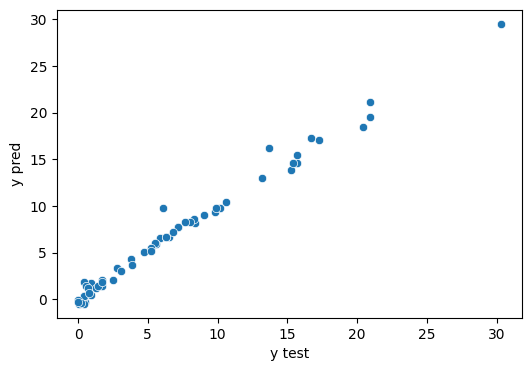

Name of model: Ridge()
Real : [8.4, 7.2, 0.5, 3.8, 6.5, 0.7] 
Prediccion: [ 8.24816068  7.79436584 -0.23138595  4.39570535  6.74269711  1.41740881]
Metrics:
R2 : 0.9841057412656321
MAE : 0.5684447703033777
RMSE : 0.838742225011386


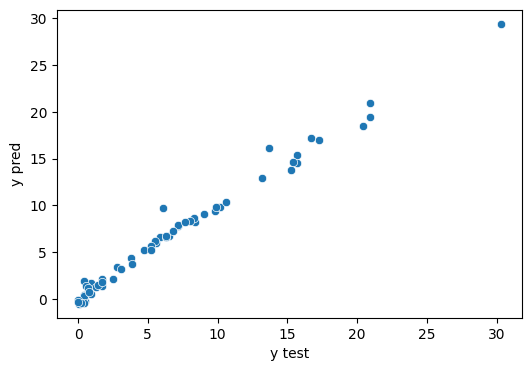

Name of model: Lasso()
Real : [8.4, 7.2, 0.5, 3.8, 6.5, 0.7] 
Prediccion: [7.84570697 7.47604156 1.06280594 5.57181806 7.15885148 2.98472637]
Metrics:
R2 : 0.9492019626116541
MAE : 1.1331762054391352
RMSE : 1.4994494693972444


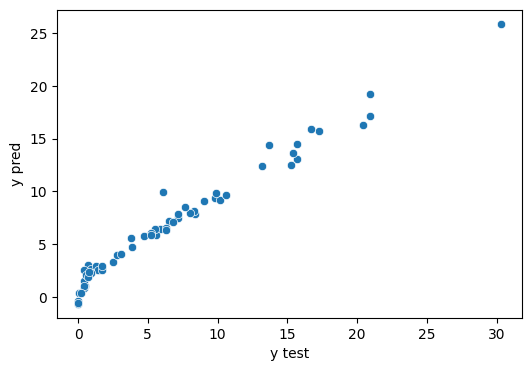

Name of model: ElasticNet()
Real : [8.4, 7.2, 0.5, 3.8, 6.5, 0.7] 
Prediccion: [8.44018939 8.48416926 1.58398205 5.7470462  7.99924592 3.84544922]
Metrics:
R2 : 0.8753457914774971
MAE : 1.8822362382093927
RMSE : 2.348885467533615


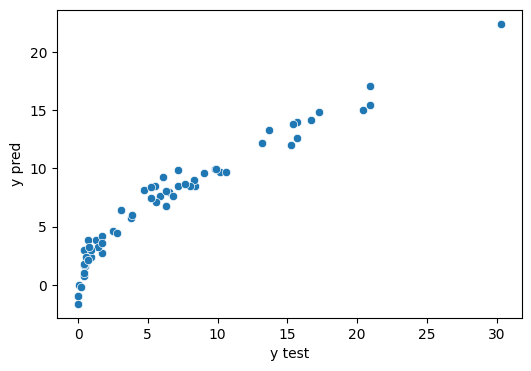

In [64]:
train_and_predict(modelos_1)

Name of model: RidgeCV(cv=5)
Real : [8.4, 7.2, 0.5, 3.8, 6.5, 0.7] 
Prediccion: [ 8.39572854  8.05344108 -0.01352556  4.67134288  7.08211955  1.79945151]
Metrics:
R2 : 0.9759220324279645
MAE : 0.786617780652176
RMSE : 1.0323293640209277


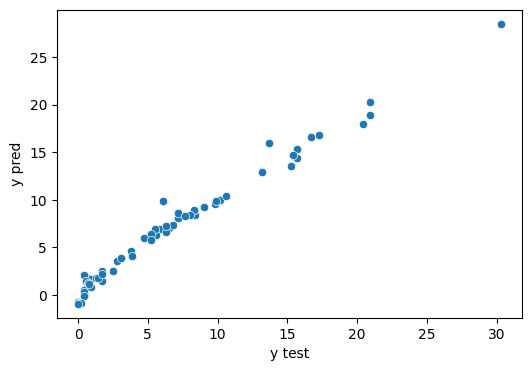

Name of model: LassoCV(cv=5)
Real : [8.4, 7.2, 0.5, 3.8, 6.5, 0.7] 
Prediccion: [ 8.17474594  7.6829938  -0.25689977  4.72650742  6.78674383  1.77616527]
Metrics:
R2 : 0.9820966287562936
MAE : 0.6199034284623428
RMSE : 0.8901757862112852


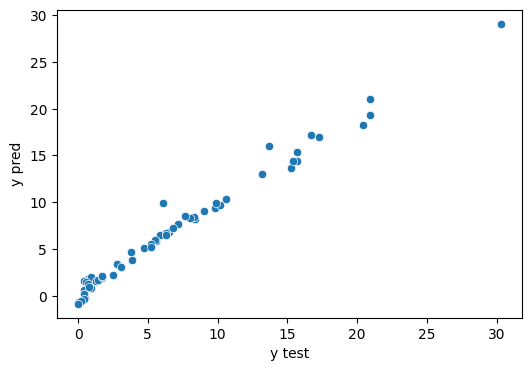

Name of model: ElasticNetCV(cv=5)
Real : [8.4, 7.2, 0.5, 3.8, 6.5, 0.7] 
Prediccion: [ 8.28717247  7.85677334 -0.16312776  4.63825264  6.91824071  1.72964092]
Metrics:
R2 : 0.9806926133020228
MAE : 0.6730732608370016
RMSE : 0.924421665990957


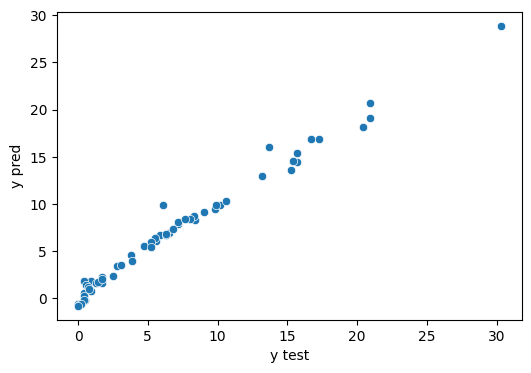

In [65]:
train_and_predict(modelos_2)

In [68]:
m_linreg.coef_

array([-0.0388722 , -0.17262579, -0.03924942, -0.82260253,  3.69880895,
        4.84411943,  0.403268  , -0.39368662])

In [67]:
m_ridge.coef_

array([-0.03600127, -0.19893851, -0.03413314, -0.78389451,  3.68494091,
        4.75737156,  0.43102198, -0.38860041])

Seleccionamos Ridge model, ya que penaliza los features que no tienen tanta importancia.

Asimismo, serializamos el modelo y el scalador. No usamos pickle ya que este no tiene tanta seguridad en la persistencia al momento de des-serializar el modelo. Por ello utilizamos una nueva libreria que es skops, que resuelve el problema de seguridad de pickle.

In [70]:
import skops.io as sio

In [71]:
sio.dump(m_ridge, 'ridge_model.skops')
sio.dump(scaler, 'scaler.skops')

In [72]:
#des-serializamos el modelo para ver validar la persistencia de nuestro modelo
m_ridge_des = sio.load('ridge_model.skops')

In [75]:
m_ridge_des.coef_ - m_ridge.coef_   #verificamos que se conservan los coeficientes en cada modelo

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
print(f'Real : {list(y_test[:6])}')
print(f'Prediccion con modelo Original: {m_ridge.predict(X_test_scaled)[:6]}')
print(f'Prediccion con modelo des-serial: {m_ridge_des.predict(X_test_scaled)[:6]}')

Real : [8.4, 7.2, 0.5, 3.8, 6.5, 0.7]
Prediccion con modelo Original: [ 8.24816068  7.79436584 -0.23138595  4.39570535  6.74269711  1.41740881]
Prediccion con modelo des-serial: [ 8.24816068  7.79436584 -0.23138595  4.39570535  6.74269711  1.41740881]


Se valida que se conserva la persistencia del modelo